In [1]:
import networkx as nx
import scipy as sc
import matplotlib.pyplot as plt
from itertools import combinations
import operator
from gurobipy import *
import random as rd

In [2]:
commodities = ['first','second','third']

In [3]:
G = nx.Graph(nx.barabasi_albert_graph(1000, 2))
pos=nx.spring_layout(G)

# G=nx.DiGraph()
# filename="./roadNet-TX.txt"
# f=open(filename)
# for row in f:
#     myrow=row.split()
#     G.add_edge(myrow[0], myrow[1])

In [4]:
G.number_of_edges()

1996

In [5]:
for (i,j,d) in G.edges(data=True):
    d['weight']=rd.randint(800,2000)

In [6]:
for i,j,d in G.edges(data=True):
    print(d)

{'weight': 1281}
{'weight': 912}
{'weight': 1767}
{'weight': 1756}
{'weight': 1804}
{'weight': 1656}
{'weight': 1721}
{'weight': 1937}
{'weight': 862}
{'weight': 1854}
{'weight': 1687}
{'weight': 1757}
{'weight': 1845}
{'weight': 1192}
{'weight': 1355}
{'weight': 941}
{'weight': 1827}
{'weight': 1035}
{'weight': 1223}
{'weight': 1590}
{'weight': 1746}
{'weight': 897}
{'weight': 1468}
{'weight': 1089}
{'weight': 1218}
{'weight': 1656}
{'weight': 1703}
{'weight': 1356}
{'weight': 987}
{'weight': 832}
{'weight': 829}
{'weight': 1939}
{'weight': 1992}
{'weight': 900}
{'weight': 986}
{'weight': 1547}
{'weight': 946}
{'weight': 1433}
{'weight': 1346}
{'weight': 1613}
{'weight': 1585}
{'weight': 1411}
{'weight': 1111}
{'weight': 1346}
{'weight': 1876}
{'weight': 972}
{'weight': 1182}
{'weight': 953}
{'weight': 1204}
{'weight': 1803}
{'weight': 1600}
{'weight': 1170}
{'weight': 1066}
{'weight': 1726}
{'weight': 1073}
{'weight': 1766}
{'weight': 1993}
{'weight': 965}
{'weight': 1383}
{'weight':

In [7]:
for k in commodities:
    for (i,d) in G.nodes(data=True):
        d[k]=0
        


In [8]:
for (i,j,d) in G.edges(data=True):
    d['capacity']=1

In [9]:
supplier=rd.sample(G.nodes(),3)
terminals=rd.sample(G.nodes(),3)

/var/folders/np/xyxhbcvd7ks47j34qd3svpf00000gn/T/ipykernel_61819/3947234727.py:1: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  supplier=rd.sample(G.nodes(),3)
/var/folders/np/xyxhbcvd7ks47j34qd3svpf00000gn/T/ipykernel_61819/3947234727.py:2: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  terminals=rd.sample(G.nodes(),3)


In [10]:
for i,d in G.nodes(data=True):
    if i==supplier[0]:
        d['first']=-2
        print(i,d['first'])
    if i==supplier[1]:
        d['second']=-2
        print(i,d['second'])
    if i==supplier[2]:
        d['third']=-2
    

431 -2
621 -2


In [11]:
for i,d in G.nodes(data=True):
    if i==terminals[0]:
        d['first']=2
        print(i,d['first'])
    if i==terminals[1]:
        d['second']=2
        print(i,d['second']) 
    if i==terminals[2]:
        d['third']=2

721 2
912 2


In [12]:
from gurobipy import *
m=Model('commodityflow')

Set parameter Username
Academic license - for non-commercial use only - expires 2023-08-20


In [13]:
x = {}
for k in commodities:
    for i,d in G.nodes(data=True):
        for j in G.nodes():
            if (i,j) in G.edges():
                x[(k,i,j)] = m.addVar(lb=0,ub=1,vtype=GRB.BINARY,name='x.{0}.{1}.{2}'.format(k, i, j))

In [14]:
for (i,j,d) in G.edges(data=True):
    sum9=0
    for k in commodities:
        sum9+=x[(k,i,j)]
    m.addConstr(sum9<=d['capacity'])

In [15]:
for k in commodities:
    for i,d in G.nodes(data=True):
        sum1=0
        sum2=0
        for j in G.nodes():
            if i!=j:
                if (i,j) in G.edges():
                    sum1+=x[(k,i,j)]
                if (j,i) in G.edges():
                    sum2+=x[(k,j,i)]
        m.addConstr((sum2-sum1)==d[k])

In [16]:
obj=0
for k in commodities:
    for i,j,d in G.edges(data=True):
        obj+=x[(k,i,j)]*d['weight']

In [17]:
m.update()
m.setObjective(obj,GRB.MINIMIZE)
m.optimize()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[rosetta2])
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 4996 rows, 11976 columns and 29940 nonzeros
Model fingerprint: 0xc49942f7
Variable types: 0 continuous, 11976 integer (11976 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [8e+02, 2e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+00]
Presolve removed 17 rows and 49 columns
Presolve time: 0.04s
Presolved: 4979 rows, 11927 columns, 29822 nonzeros
Variable types: 0 continuous, 11927 integer (11927 binary)
Found heuristic solution: objective 27543.000000

Root relaxation: objective 1.590300e+04, 332 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0    15903.000000 15903.0000  0.00%     -    0s

Explor

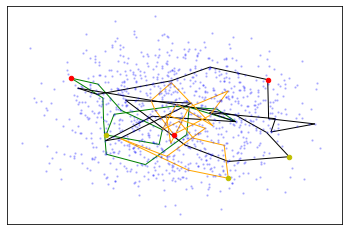

In [18]:
route1=[(i,j) for (i,j) in G.edges() if x[('first',i,j)].X>0 or x[('first',j,i)].X>0]
route2=[(i,j) for (i,j) in G.edges() if x[('second',i,j)].X>0 or x[('second',j,i)].X>0]
route3=[(i,j) for (i,j) in G.edges() if x[('third',i,j)].X>0 or x[('third',j,i)].X>0]
pos=nx.spring_layout(G)
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos,nodelist=G.nodes(),node_color='b', node_size=2,alpha=0.2)
nx.draw_networkx_nodes(G,pos,nodelist=supplier,node_color='y', node_size=20)
nx.draw_networkx_nodes(G,pos,nodelist=terminals,node_color='r', node_size=20)
nx.draw_networkx_edges(G,pos,edgelist=route1,edge_color='g', width=1)
nx.draw_networkx_edges(G,pos,edgelist=route2,edge_color='black',width=1)
nx.draw_networkx_edges(G,pos,edgelist=route3,edge_color='orange',width=1)
plt.savefig("k=3.png", dpi=1000)
